# 使用tibble实现简单数据框

这一部分作者也写的很简洁，无外乎建议我们使用tibble数据框来替代data.frame数据框，还有就是简单的创建和使用tibble数据框

由于jupyter对tibble数据框不支持，这里尽管会写，但是看不出来一些差异，所以还会在RDataScience_test目录里用Rmd写一份

In [1]:
# 加载tidyverse包
library(tidyverse)

─ Attaching packages ──────────────────── tidyverse 1.2.1 ─
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
─ Conflicts ───────────────────── tidyverse_conflicts() ─
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## 创建tibble

In [2]:

### 从data.frame创建tibble
iris %>% head() # 看data.frame
as_tibble(iris) %>% head() # 看tibble，这里看不出来

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
##  通过tibble()函数使用vector创建tibble
tibble(
    x = 1:10,
    y = 1,
    z= x^2 + y)

x,y,z
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26
6,1,37
7,1,50
8,1,65
9,1,82
10,1,101


tibble尽管是新的，但相比data.frame功能要少，不过接受R中无效的变量名称，用反引号引起来即可,使用这些变量的时候也要使用反引号

In [4]:
tb <- tibble(
    `)` = "smile",
    ` ` = "space",
    `2000` = "number")
tb

),,2000
smile,space,number


In [5]:
# 也可以使用tribble()函数创建tibble，列标题由公式(~开头)定义，数据条目以逗号分隔
tribble(
    ~x,~y,~z,
    #--|--|--# 是注释
    "a", 2, 3.6,
    "b", 1, 8.4
)

x,y,z
a,2,3.6
b,1,8.4


## 对比 tibble与data.frame

### 打印的差异

tibble默认只显示前10行，而且列是适合屏幕的，还打印数据类型，jupyter不支持，看不出来；data.frame的打印就省略了

In [6]:
tibble(
    a = lubridate::now() + runif(1e3)*86400,
    b = lubridate::today() + runif(1e3)*30,
    c = 1:1e3,
    d = runif(1e3),
    e = sample(letters, 1e3, replace = T)
)%>% head()

Warning message:
“运行命令'timedatectl'的状态是1”

a,b,c,d,e
2019-10-20 22:49:36,2019-11-05,1,0.4295705,e
2019-10-21 10:00:32,2019-10-21,2,0.8071014,d
2019-10-21 07:53:54,2019-11-16,3,0.2065430,r
2019-10-21 19:40:49,2019-11-03,4,0.2152468,f
2019-10-21 06:50:58,2019-11-13,5,0.9688459,m
2019-10-21 10:59:19,2019-10-31,6,0.1238433,f


In [7]:
# 更改默认显示输出
# 使用print()函数，n：行数，width：显示宽度
nycflights13::flights %>%
print(n = 10, width = Inf)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

还可以通过设置以下选项来控制默认的打印方式。

• options(tibble.print_max = n, tibble.pring_min = m)：如果多于m行，则只打印出n行。options(tibble.print_min = Inf)表示总是打印所有行。

• options(tibble.width = Inf)表示总是打印所有列，不考虑屏幕的宽度。

### 取子集

取子集的方法无非是用"$"和[[]]


In [8]:
df <- tibble(
    x = runif(5),
    y = rnorm(5)
)

df$x
df[["x"]]
df[,"x"]
df[,1]

[1] 0.7077850 0.1332242 0.7640809 0.7213249 0.5557485

[1] 0.7077850 0.1332242 0.7640809 0.7213249 0.5557485

x
0.7077850
0.1332242
0.7640809
0.7213249
0.5557485


x
0.7077850
0.1332242
0.7640809
0.7213249
0.5557485


In [9]:
# 要想在管道中使用这些提取操作，使用特殊占位符"."
df %>% .$x
df %>% .[["x"]]

[1] 0.7077850 0.1332242 0.7640809 0.7213249 0.5557485

[1] 0.7077850 0.1332242 0.7640809 0.7213249 0.5557485

与data.frame相比，tibble更严格：它不能进行部分匹配，如果想要访问的列不存在，它会生成一条警告信息。

### 与旧代码进行交互

有些函数不支持tibble，可以使用as.data.frame()函数转换

## 练习

# (1) 如何识别一个对象是否为tibble？


# 直接打印出来即可，显示上很容易区别


In [10]:
# (2) 对比在data.frame和等价的tibble上进行的以下操作。有何区别？
# 为什么默认的数据框操作会让人感到沮丧

# df <-data.frame(abc =1, xyz ="a") 
# df$x 
# df[, "xyz"] 
# df[, c("abc", "xyz")]

In [11]:
df <-data.frame(abc =1, xyz ="a") 
df$x 
df[, "xyz"] 
df[, c("abc", "xyz")]

[1] a
Levels: a

[1] a
Levels: a

abc,xyz
1,a


In [12]:
df <-tibble(abc =1, xyz ="a") 
df$x # tibble更加严格，不能模糊匹配
df[, "xyz"] 
df[, c("abc", "xyz")]

Warning message:
“Unknown or uninitialised column: 'x'.”

NULL

xyz
a


abc,xyz
1,a


In [13]:
## (3) 如果将一个变量的名称保存在一个对象中，
# 如var  <-  "mpg"，如何从tibble中提取出这个变量？

# 用上面的例子
var <- "xyz"
# df%var # 这样不可以
df[,var]
df[[var]]
# df$`var` # 这样也不可以

xyz
a


[1] "a"

In [14]:
## (4) 在以下的数据框中练习如何引用不符合语法规则的变量名。
## a. 提取名称为1的变量。
## b. 绘制表示变量1和变量2关系的散点图。
## c. 创建一个名称为3的新列，其值为列2除以列1。
## d. 将这些列重新命名为one、two和three。
annoying <-tibble(   
    `1` =1:10,   
    `2` = `1` *2+rnorm(length(`1`)) 
)

[1]  1  2  3  4  5  6  7  8  9 10

1,2,3
1,3.080166,3.080166
2,3.504817,1.752409
3,5.907348,1.969116
4,8.873859,2.218465
5,12.221696,2.444339
6,11.526668,1.921111
7,13.608353,1.944050
8,17.573763,2.196720
9,18.110902,2.012322
10,18.988575,1.898857


one,two,three
1,3.080166,3.080166
2,3.504817,1.752409
3,5.907348,1.969116
4,8.873859,2.218465
5,12.221696,2.444339
6,11.526668,1.921111
7,13.608353,1.944050
8,17.573763,2.196720
9,18.110902,2.012322
10,18.988575,1.898857


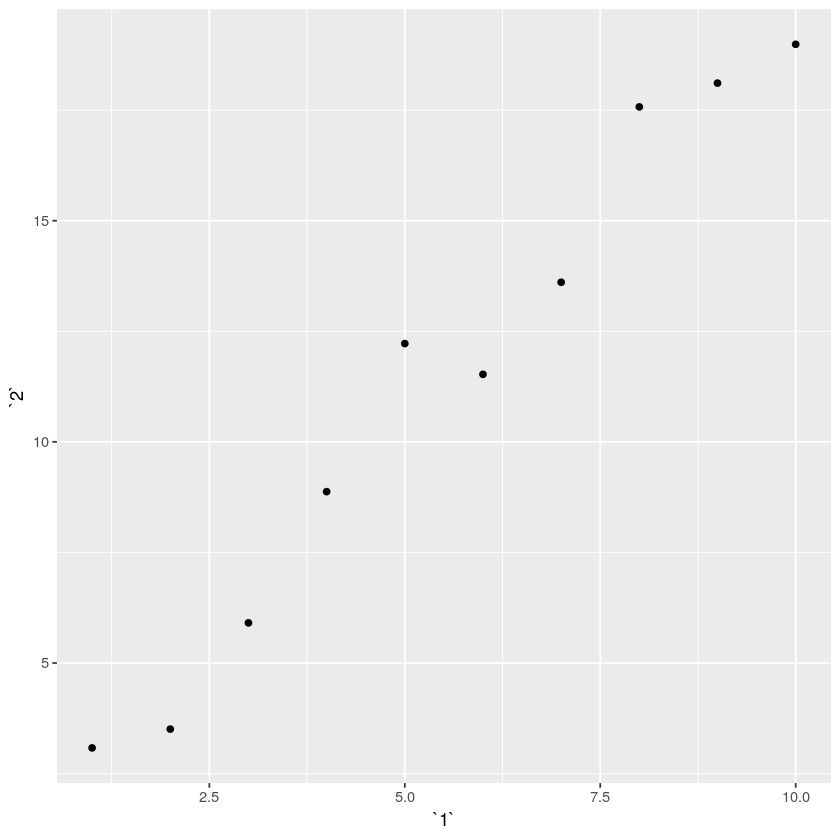

In [15]:
# a
annoying$`1`
# b
ggplot(annoying) + geom_point(aes(x = `1`, y = `2`))
# c
(annoying <- mutate(annoying, `3` = `2`/`1`))
# d
colnames(annoying) = c("one","two","three")
annoying

结束